# HW8. Clusters analysis

In [3]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [4]:
np.set_printoptions(linewidth=1000)

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

## Rencher 14.8

In [7]:
cols = [f"y{i}" for i in range(1, 7)]
df = pd.read_table("data/T4_3_HEMATOL.DAT", header=None, sep="\s+", names=cols)

In [9]:
df.head()

,y1,y2,y3,y4,y5,y6
0,13.4,39,4100,14,25,17
1,14.6,46,5000,15,30,20
2,13.5,42,4500,19,21,18
3,15.0,46,4600,23,16,18
4,14.6,44,5100,17,31,19


In [12]:
df_normilized = (df - df.mean()) / df.std()

### A. Centroid linkage method

In [45]:
Z = linkage(df, method='centroid')

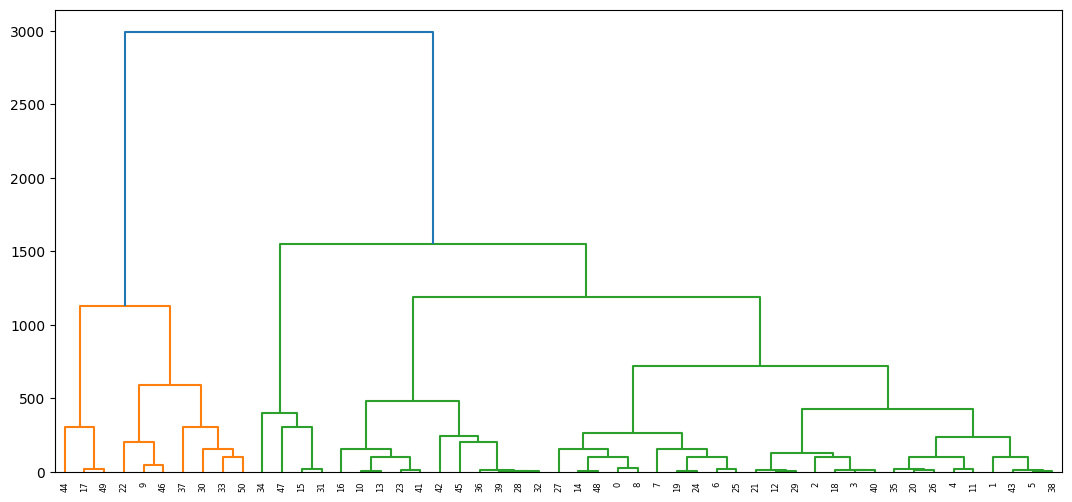

In [46]:
fig, ax = plt.subplots(figsize=(13, 6))
dn = dendrogram(Z)
plt.show()

In [47]:
Z[-10:]

array([[  44.        ,   65.        ,  300.33990744,    3.        ],
       [  34.        ,   89.        ,  400.07247816,    4.        ],
       [  79.        ,   86.        ,  427.02335845,   16.        ],
       [  82.        ,   87.        ,  480.01829479,   11.        ],
       [  85.        ,   90.        ,  591.73434683,    7.        ],
       [  88.        ,   93.        ,  718.76204119,   26.        ],
       [  91.        ,   95.        , 1128.61995652,   10.        ],
       [  94.        ,   96.        , 1189.53862391,   37.        ],
       [  92.        ,   98.        , 1545.97866619,   41.        ],
       [  97.        ,   99.        , 2994.93876774,   51.        ]])

In [62]:
print(f"Distance between two clasters in the two-clusters solution: {Z[-1, 2]}")

Distance between two clasters in the two-clusters solution: 2994.9819381598304


### B. Average linkage method

In [49]:
Z = linkage(df, method='average')

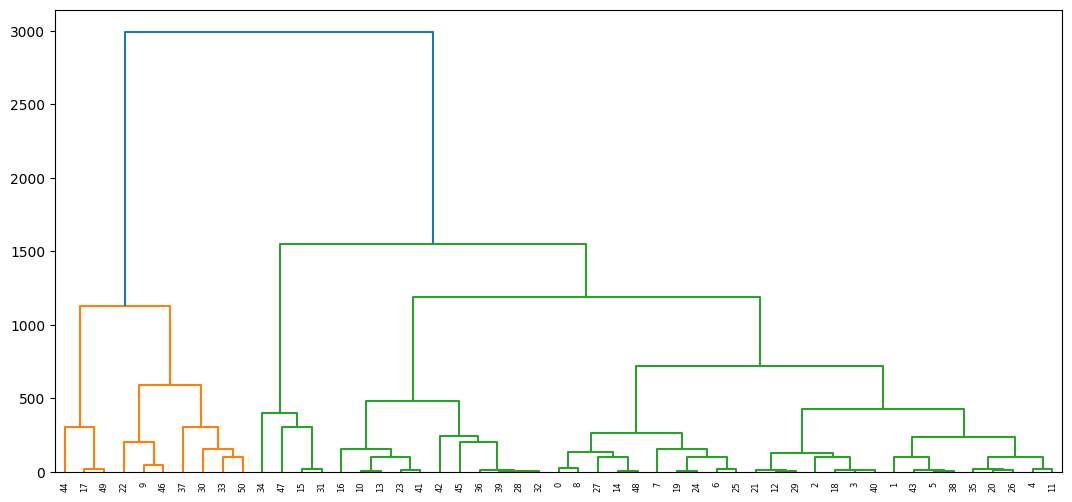

In [50]:
fig, ax = plt.subplots(figsize=(13, 6))
dn = dendrogram(Z)
plt.show()

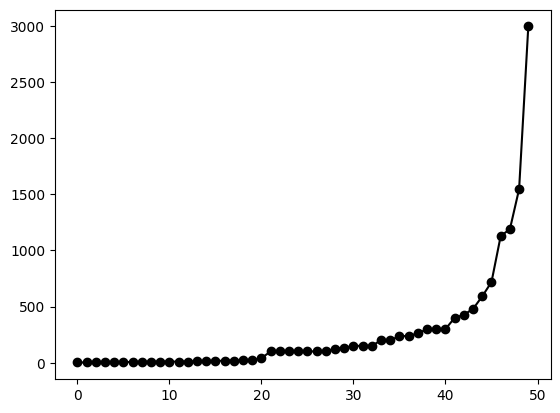

In [68]:
plt.plot(np.arange(50), Z[:, 2], marker="o", color='black')
plt.show()

From the dendrogram the optimal number of clusters is $2$, as it corresponds to the largest minimal distance gap before next union 

### C. Discriminant function for the two clusters from B

In [83]:
class Node:
    def __init__(self, i):
        self.history = [i]

nodes = [Node(i) for i in range(df.shape[0])]

In [94]:
union_operations = Z[:, :2].astype(int)

In [105]:
clusters = [[i] for i in range(df.shape[0])]

for j in range(union_operations.shape[0]):
    clusters.append(clusters[union_operations[j, 0]] + clusters[union_operations[j, 1]])


In [106]:
union_operations[-1]

array([97, 99])

In [107]:
labels = np.zeros_like(df.index)
labels[clusters[97]] = 1
labels[clusters[99]] = 2

In [108]:
df['labels'] = labels

In [125]:
df1 = df[df.labels==1].drop(columns='labels')
df2 = df[df.labels==2].drop(columns='labels')
n1, n2 = df1.shape[0], df2.shape[0]

In [129]:
Spl = (df1.cov() * (n1 - 1) + df2.cov() * (n2 - 1)) / (n1 + n2 - 2)
Spl_inv = np.linalg.inv(Spl)

In [130]:
Spl

,y1,y2,y3,y4,y5,y6
y1,0.661710,1.388502,80.274764,0.101503,-0.194326,-0.405704
y2,1.388502,5.079393,239.298158,0.345694,-0.574166,0.901195
y3,80.274764,239.298158,576082.130413,2281.378795,2948.257840,-355.584868
y4,0.101503,0.345694,2281.378795,42.390692,-17.387008,-1.353758
y5,-0.194326,-0.574166,2948.257840,-17.387008,48.475112,-1.320309
y6,-0.405704,0.901195,-355.584868,-1.353758,-1.320309,18.043853


In [131]:
a = Spl_inv @ (df1.mean() - df2.mean())
a

array([ 0.26318849, -0.225361  ,  0.00846295, -0.21435478, -0.43393177,  0.22303171])

In [134]:
print("Дискрімінантна функція: ", " ".join([f"{coef:.3f} * y{i}" for i, coef in enumerate(a)]))

Дискрімінантна функція:  0.263 * y0 -0.225 * y1 0.008 * y2 -0.214 * y3 -0.434 * y4 0.223 * y5


In [147]:
df_projected = pd.DataFrame()
df_projected['values'] = a @ df.iloc[:, :-1].T
df_projected['labels'] = df['labels']

In [153]:
df_projected[df_projected.labels==1]

,values,labels
9,46.866800,1
17,36.035481,1
22,45.029854,1
30,46.674870,1
33,40.600121,1
37,42.211292,1
44,40.893114,1
46,48.208083,1
49,42.115335,1
50,40.633326,1


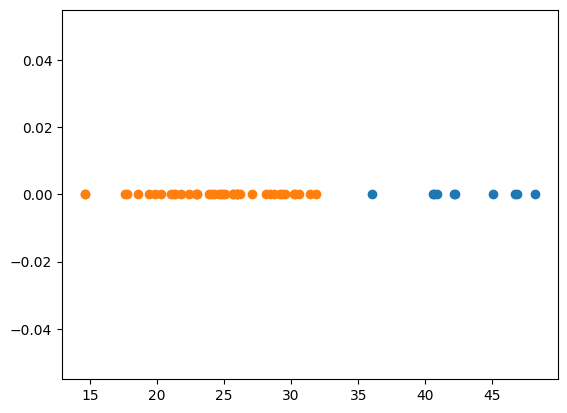

In [157]:
plt.scatter(df_projected[df_projected.labels==1]['values'], np.zeros(n1))
plt.scatter(df_projected[df_projected.labels==2]['values'], np.zeros(n2))
plt.show()

Clusters are not overlapping (i.e. they are linearly separated) 

## Rencher 14.9

### A. Three clusters 

In [160]:
cols = [f"y{i}" for i in range(1, 3)] + [f"x{i}" for i in range(1, 9)] 
df = pd.read_table("data/T7_1_SEISHU.DAT", header=None, sep="\s+", names=cols)

In [162]:
methods = ["single", "complete", "average", "centroid", "median", "ward"]

In [163]:
Z = {}
for method in methods:
    Z[method] = linkage(df, method=method)

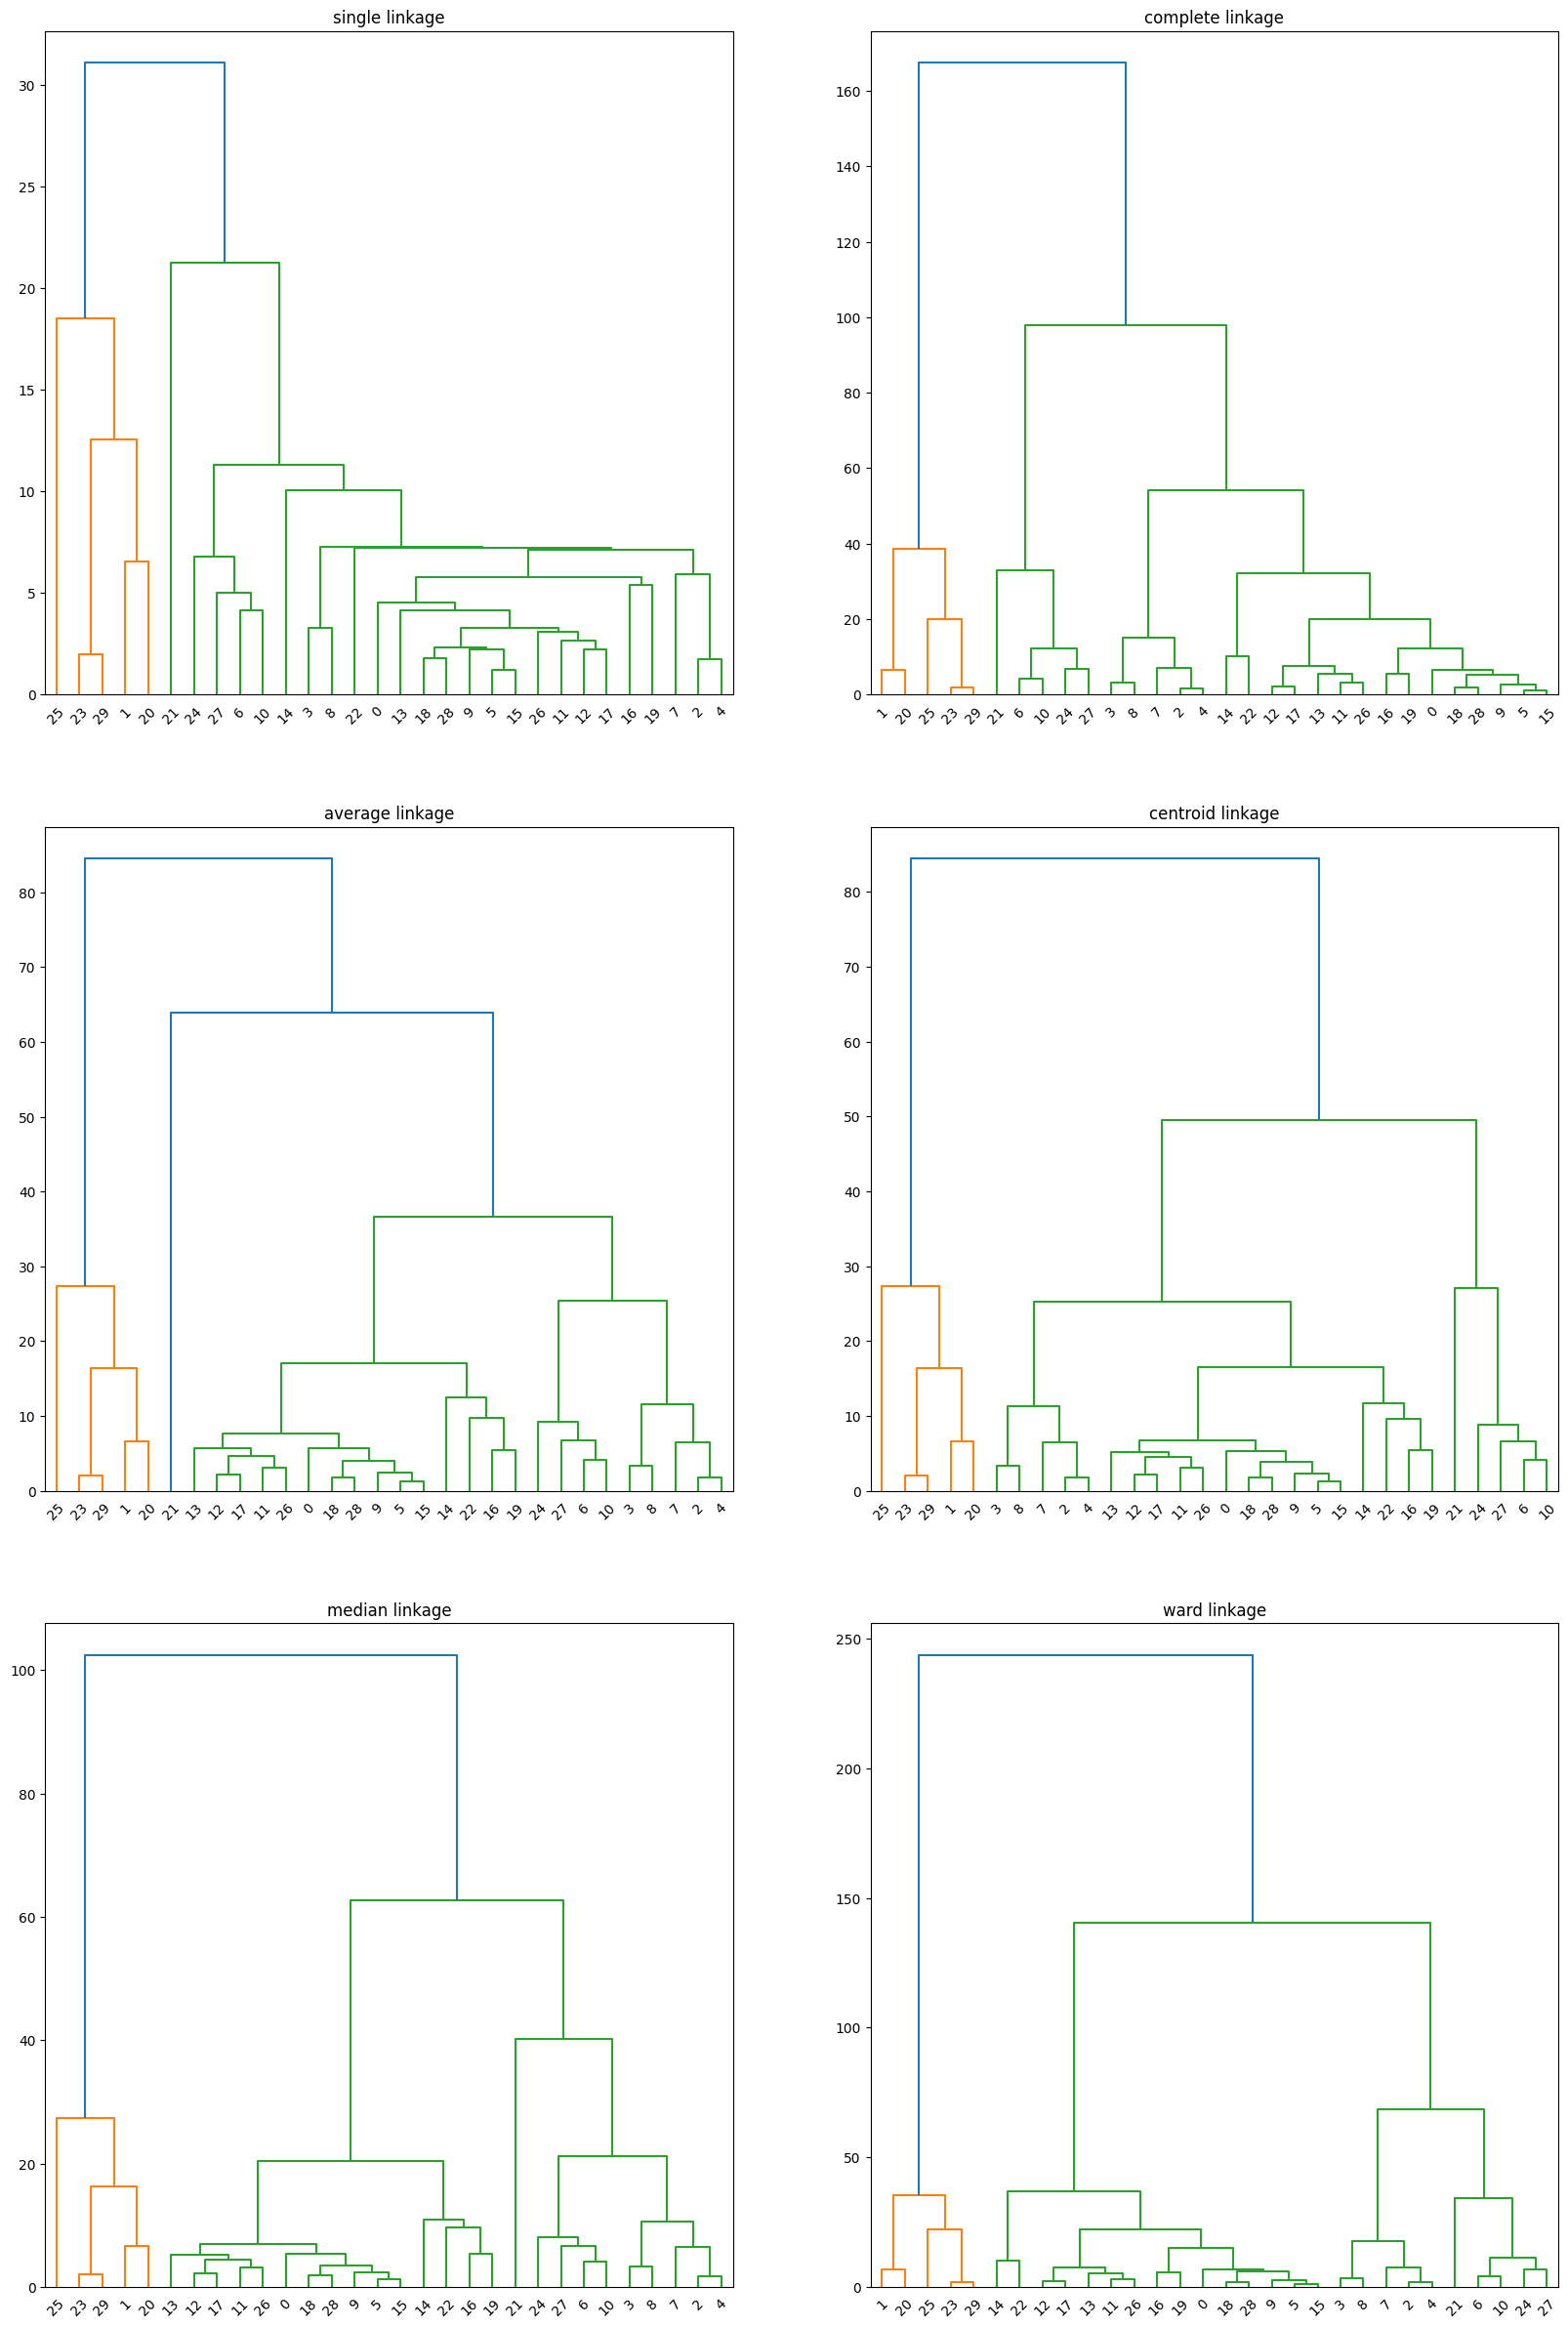

In [177]:
fig, axs = plt.subplots(3, 2, figsize=(20, 30))

for i in range(3):
    for j in range(2):
        k = i * 2 + j 
        ax = axs[i, j]
        dn = dendrogram(Z[methods[k]], ax=ax)
        ax.set_title(f"{methods[k]} linkage")

Point $21$ seems to be an outlier, because in most methods it was classified as a separate cluster till the last moments

In all methods appear the same cluster $\{25, 23, 29, 1, 20\}$

### B. Two clusters

In [181]:
cluster1 = [25, 23, 29, 1, 20]
df['labels'] = 0
df.iloc[cluster1, -1] = 1
df.iloc[df.labels==0, -1] = 2

In [183]:
df1 = df[df.labels==1].drop(columns='labels')
df2 = df[df.labels==2].drop(columns='labels')
n1, n2 = df1.shape[0], df2.shape[0]

In [184]:
Spl = (df1.cov() * (n1 - 1) + df2.cov() * (n2 - 1)) / (n1 + n2 - 2)
Spl_inv = np.linalg.inv(Spl)

In [185]:
Spl

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
y1,0.160657,0.099643,0.009771,0.002253,0.010941,0.004657,0.019461,0.005021,-0.027097,-0.367143
y2,0.099643,0.198857,-0.008543,0.007393,0.019429,-0.150286,0.028479,0.054629,0.038107,0.315357
x1,0.009771,-0.008543,0.020803,-0.002521,0.015191,-0.041650,-0.028421,-0.033016,-0.026967,1.742571
x2,0.002253,0.007393,-0.002521,0.018725,0.005994,0.048553,-0.009586,-0.002078,0.026262,-0.170429
x3,0.010941,0.019429,0.015191,0.005994,0.035912,-0.038351,-0.033480,-0.032506,0.015504,3.203786
x4,0.004657,-0.150286,-0.041650,0.048553,-0.038351,4.559657,-0.362281,-0.668107,0.013953,2.087143
x5,0.019461,0.028479,-0.028421,-0.009586,-0.033480,-0.362281,0.137836,0.158359,0.052381,-4.421036
x6,0.005021,0.054629,-0.033016,-0.002078,-0.032506,-0.668107,0.158359,0.267569,0.133558,-4.646286
x7,-0.027097,0.038107,-0.026967,0.026262,0.015504,0.013953,0.052381,0.133558,0.333449,1.296643
x8,-0.367143,0.315357,1.742571,-0.170429,3.203786,2.087143,-4.421036,-4.646286,1.296643,536.099286


In [186]:
a = Spl_inv @ (df1.mean() - df2.mean())
a

array([  0.31939067,   1.49727446,  -8.89708728, -27.14469528,   4.41559245,  -0.36312209, -13.01795991,  -1.36137694,   3.44773377,  -0.29027226])

In [187]:
print("Дискрімінантна функція: ", " ".join([f"{coef:.3f} * y{i}" for i, coef in enumerate(a)]))

Дискрімінантна функція:  0.319 * y0 1.497 * y1 -8.897 * y2 -27.145 * y3 4.416 * y4 -0.363 * y5 -13.018 * y6 -1.361 * y7 3.448 * y8 -0.290 * y9


In [188]:
df_projected = pd.DataFrame()
df_projected['values'] = a @ df.iloc[:, :-1].T
df_projected['labels'] = df['labels']

In [189]:
df_projected[df_projected.labels==1]

,values,labels
1,-86.991956,1
20,-85.171192,1
23,-85.567722,1
25,-78.780965,1
29,-82.259422,1


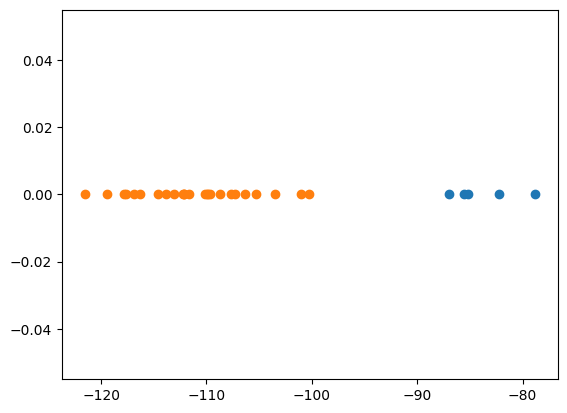

In [190]:
plt.scatter(df_projected[df_projected.labels==1]['values'], np.zeros(n1))
plt.scatter(df_projected[df_projected.labels==2]['values'], np.zeros(n2))
plt.show()

Clusters do not overlap